In [1]:
import wbdata
import pandas as pd
import tqdm
import numpy as np

from scipy.stats import norm, uniform, gaussian_kde, multivariate_normal
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from numba import njit
from see import see

In [2]:
#----------------------------------------------------------------------------------------------------------------------------------------------------------------
# Components
#----------------------------------------------------------------------------------------------------------------------------------------------------------------
import json
def txt_load(filename):
    l = []
    with open(filename, "r") as f:
        for line in f:
            l.append(line.rstrip())
    return l

def txt_dump(filename, item):
    with open(filename, "w") as f:
        for line in item:
            f.write(line + "\n")
    print("item saved to txt file \'"+ str(filename) +"\'")

def json_load(filename):
    with open(filename, "r") as f:
        j = json.load(f)
    return j

def json_dump(filename, item):
    with open(filename, "w") as f:
        json.dump(item, f)
    print("item saved to json file \'"+ str(filename) +"\'")

In [3]:
def create_column(wbd,osh,target):
    l = []
    codes = json_load("country-codes.json")
    for i in range(len(osh)):
        code = osh.iloc[i]["code"]
        year = str(osh.iloc[i]["year"])
        c = codes[code]
        try:
            l.append(wbd.loc[c].loc[year][target])
        except:
            l.append("")
    return pd.DataFrame(l)

def get_df(osh, countries, indicators):
    wbd =  wbdata.get_dataframe(indicators, country=countries)
    targets = list(indicators.values())
    for item in targets:
        print("Creating column "+item)
        osh[item] = create_column(wbd,osh,item)
    return(osh)

In [165]:
codes = json_load("country-codes.json")
osh = pd.read_csv("osmarketshare_final_5.csv")
country = codes.keys()

indicator = {
"NY.GDP.MKTP.CD":"gdp",
"SP.POP.TOTL":"population",
"AG.LND.TOTL.K2":"LandArea",
"SP.POP.0014.TO.ZS":"ChildPercentage", #percentage of population 0-14 years old
"SE.XPD.TOTL.GB.ZS":"GovEduc", #政府支出における教育の割合

"SP.POP.1564.TO.ZS":"WorkingPercentage", #percentage of population 15-64 years old
"SE.COM.DURS":"EduDuration", #義務教育年数

#"SP.DYN.TFRT.IN":"Fertility rate",
#"SP.URB.TOTL.IN.ZS":"UrbanPopulation",
#"IP.JRN.ARTC.SC":"articles",
#"SL.TLF.TOTL.IN":"labor-force",
#"TX.VAL.OTHR.ZS.WT":"computer", #コンピューター・通信・その他サービス(サービス輸出比) - Computer, communications and other services (% of commercial service exports)
}

In [166]:
df = get_df(osh,country,indicator)
df

Creating column gdp
Creating column population
Creating column LandArea
Creating column ChildPercentage
Creating column GovEduc
Creating column WorkingPercentage
Creating column EduDuration


,Unnamed: 0.2,Unnamed: 0.1,sortname,Unnamed: 0,Android,iOS,country,year,code,gdp,population,LandArea,ChildPercentage,GovEduc,WorkingPercentage,EduDuration
0,0,0,Afghanistan2009,5.5,0.514167,8.878333,Afghanistan,2009,AFG,12416161048.8412,28394806.0,652230.0,48.250411,17.309999,49.443999,9.0
1,1,1,Afghanistan2010,17.5,2.404167,15.584167,Afghanistan,2010,AFG,15856678596.148001,29185511.0,652230.0,48.178145,17.06756,49.493723,9.0
2,2,2,Afghanistan2011,29.5,4.297500,18.635000,Afghanistan,2011,AFG,17805113118.893799,30117411.0,652230.0,47.70159,16.048429,49.943948,9.0
3,3,3,Afghanistan2012,41.5,12.001667,14.960833,Afghanistan,2012,AFG,19907317065.666599,31161378.0,652230.0,47.089759,14.62,50.523947,9.0
4,4,4,Afghanistan2013,53.5,26.749167,14.941667,Afghanistan,2013,AFG,20146404996.223,32269592.0,652230.0,46.386671,14.1028,51.193122,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,3439,3439,Zimbabwe2018,113.5,78.754167,3.880000,Zimbabwe,2018,ZWE,18115543790.7855,14438812.0,386850.0,42.401066,19.039841,54.65941,7.0
2936,3440,3440,Zimbabwe2019,125.5,83.975833,7.264167,Zimbabwe,2019,ZWE,19284289739.051701,14645473.0,386850.0,42.158127,NaN,54.861265,7.0
2937,3441,3441,Zimbabwe2020,137.5,84.956667,10.784167,Zimbabwe,2020,ZWE,18051170798.941002,14862927.0,386850.0,41.9111,NaN,55.074722,7.0
2938,3442,3442,Zimbabwe2021,149.5,84.955000,12.000833,Zimbabwe,2021,ZWE,26217726717.3386,15092171.0,NaN,41.321696,NaN,55.62223,NaN


In [167]:
df.to_csv("wb_1212.csv")

In [ ]:
for item in df.columns.tolist():
    df.plot.scatter(item,"iOS")
    plt.xlabel(item)
    plt.ylabel("iOS")
    #plt.savefig("graphs/"+item+"_ios.png")

In [218]:
df = pd.read_csv("wb_1210.csv")
df

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,sortname,Unnamed: 0,Android,iOS,country,year,code,gdp,population,LandArea,ChildPercentage,WorkingPercentage,GovEduc
0,0,0,0,Afghanistan2009,5.5,0.514167,8.878333,Afghanistan,2009,AFG,1.241616e+10,28394806.0,652230.0,48.250411,49.443999,17.309999
1,1,1,1,Afghanistan2010,17.5,2.404167,15.584167,Afghanistan,2010,AFG,1.585668e+10,29185511.0,652230.0,48.178145,49.493723,17.067560
2,2,2,2,Afghanistan2011,29.5,4.297500,18.635000,Afghanistan,2011,AFG,1.780511e+10,30117411.0,652230.0,47.701590,49.943948,16.048429
3,3,3,3,Afghanistan2012,41.5,12.001667,14.960833,Afghanistan,2012,AFG,1.990732e+10,31161378.0,652230.0,47.089759,50.523947,14.620000
4,4,4,4,Afghanistan2013,53.5,26.749167,14.941667,Afghanistan,2013,AFG,2.014640e+10,32269592.0,652230.0,46.386671,51.193122,14.102800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,2935,3439,3439,Zimbabwe2018,113.5,78.754167,3.880000,Zimbabwe,2018,ZWE,1.811554e+10,14438812.0,386850.0,42.401066,54.659410,19.039841
2936,2936,3440,3440,Zimbabwe2019,125.5,83.975833,7.264167,Zimbabwe,2019,ZWE,1.928429e+10,14645473.0,386850.0,42.158127,54.861265,NaN
2937,2937,3441,3441,Zimbabwe2020,137.5,84.956667,10.784167,Zimbabwe,2020,ZWE,1.805117e+10,14862927.0,386850.0,41.911100,55.074722,NaN
2938,2938,3442,3442,Zimbabwe2021,149.5,84.955000,12.000833,Zimbabwe,2021,ZWE,2.621773e+10,15092171.0,NaN,41.321696,55.622230,NaN


In [26]:
desktop = pd.read_csv("./osmarketshare_total-desktop.csv")
desktop["year"] = [ x.split("-")[0] for x in desktop["Date"] ]
desktop["sortname"] = desktop["Country"] + desktop["year"]
desktop = desktop.groupby(by="sortname").mean()
desktop["year"] = [ int(x[-4:]) for x in desktop.index ]

17.592499999999998

<AxesSubplot:xlabel='EduDuration', ylabel='iOS'>

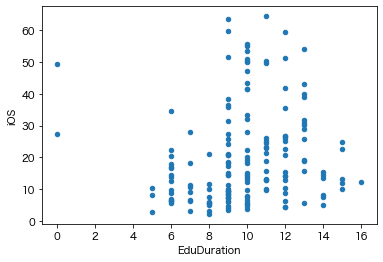

In [187]:

df[df["year"]==2020].plot.scatter(x="EduDuration", y="iOS")

In [215]:
#----------------------------------------------------------------------------------------------------------------------------------------------------------------
# df作成
#----------------------------------------------------------------------------------------------------------------------------------------------------------------


df = pd.read_csv("wb_1212.csv")
df = df.sort_values(["country","year"])

# 一人当たりGDP・人口密度対数化
df["percapita_log"] = np.log10(df["gdp"] / df["population"] +1)
df["population_log"] = np.log10(df["population"] +1)
df["density"] = np.log10(df["LandArea"] / df["population"]+1)
df["ios"] = df["iOS"]/(df["Android"]+df["iOS"])



#Macシェア率
desktop = pd.read_csv("./osmarketshare_total-desktop.csv")
desktop["year"] = [ x.split("-")[0] for x in desktop["Date"] ]
desktop["sortname"] = desktop["Country"] + desktop["year"]
desktop = desktop.groupby(by="sortname").mean()
desktop["year"] = [ int(x[-4:]) for x in desktop.index ]

osxl = []
for x in df["sortname"]:
    osx = desktop.loc[x]["OS X"]
    osxl.append(osx)

#言語・民族・宗教ダミー
dummies = pd.read_csv("dummies.csv")
dummies["NonReli"] = dummies["NonReli"].fillna(0)
dummies = dummies.drop(columns=["Unnamed: 0","BritanicaLink","Lang"])
ds = pd.DataFrame()
for item in df["country"].tolist():
    ds = pd.concat([ds, dummies[dummies["cs"]==item]])



df = pd.concat([df,ds.reset_index(), pd.DataFrame(osxl, columns=["OSX"])],axis=1)

df = df.drop(columns=["Unnamed: 0.3", "Unnamed: 0.2","Unnamed: 0.1","Unnamed: 0"])

In [200]:
#----------------------------------------------------------------------------------------------------------------------------------------------------------------
# クロスセクション
#----------------------------------------------------------------------------------------------------------------------------------------------------------------

data = df[df["year"]==2020]
data

,sortname,Android,iOS,country,year,code,gdp,population,LandArea,ChildPercentage,...,ios,index,cs,island,LangCount,EthnicCount,ReliCount,NonReli,Unnamed: 7,OSX
11,Afghanistan2020,90.645000,8.955833,Afghanistan,2020,AFG,2.011614e+10,38928341.0,652230.0,41.822601,...,0.089917,0,Afghanistan,0,2,4,2,0.0,Afghanistan,5.321667
25,Albania2020,63.783333,35.714167,Albania,2020,ALB,1.513187e+10,2837849.0,27400.0,17.235858,...,0.358945,1,Albania,0,1,2,3,0.0,Albania,7.129167
39,Algeria2020,95.804167,3.855833,Algeria,2020,DZA,1.450092e+11,43851043.0,2381741.0,30.783516,...,0.038690,2,Algeria,0,1,3,1,0.0,Algeria,4.585000
53,American Samoa2020,66.283333,33.586667,American Samoa,2020,ASM,7.090000e+08,55197.0,200.0,NaN,...,0.336304,3,American Samoa,1,2,1,5,0.0,American-Samoa,26.961667
67,Andorra2020,66.559167,33.183333,Andorra,2020,AND,2.891001e+09,77265.0,470.0,NaN,...,0.332690,4,Andorra,0,1,4,2,0.0,Andorra,36.854167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2881,Virgin Islands British2020,67.906667,31.865000,Virgin Islands British,2020,VGB,NaN,NaN,NaN,NaN,...,0.319379,205,Virgin Islands British,1,1,4,1,0.0,NaN,26.425000
2895,Virgin Islands U.S2020,49.340833,50.366667,Virgin Islands U.S,2020,VIR,NaN,NaN,NaN,NaN,...,0.505144,206,Virgin Islands U.S,1,1,4,1,0.0,NaN,26.480833
2909,Yemen2020,96.210000,2.760000,Yemen,2020,YEM,NaN,NaN,NaN,NaN,...,0.027887,207,Yemen,0,1,1,2,0.0,Yemen,1.841667
2923,Zambia2020,88.290833,6.376667,Zambia,2020,ZMB,1.811063e+10,18383956.0,743390.0,44.017389,...,0.067359,208,Zambia,0,1,5,2,0.0,Zambia,8.035000


In [206]:
#formula = "iOS ~ gdp + population + LandArea + UrbanPopulation + ChildPercentage + WorkingPercentage"
#data = data.dropna()
print(len(data))
formula = "iOS ~ percapita_log + WorkingPercentage + OSX + island + LangCount + EthnicCount + ReliCount + NonReli"
res = ols(formula, data=data).fit()
print(res.summary())

210
                            OLS Regression Results                            
Dep. Variable:                    iOS   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     49.31
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           3.94e-38
Time:                        16:02:58   Log-Likelihood:                -532.64
No. Observations:                 158   AIC:                             1083.
Df Residuals:                     149   BIC:                             1111.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -13.8599      

In [223]:
#----------------------------------------------------------------------------------------------------------------------------------------------------------------
# パネル
#----------------------------------------------------------------------------------------------------------------------------------------------------------------

names={
    "iOS":"iOS_diff",
    "percapita_log":"percapita_log_diff",
    "ChildPercentage":"ChildPercentage_diff",
    "OSX":"OSX_diff",
}

panel = pd.concat([
        df[["country","year","sortname","iOS","percapita_log","ChildPercentage","OSX"]],
        df.groupby("country")[["iOS", "OSX", "percapita_log", "ChildPercentage"]].diff().rename(columns = names)
    ],axis=1)

In [ ]:
#formula = "iOS ~ gdp + population + LandArea + UrbanPopulation + ChildPercentage + WorkingPercentage"
#data = data.dropna()
print(len(data))
formula = "iOS ~ percapita_log + WorkingPercentage + OSX + island + LangCount + EthnicCount + ReliCount + NonReli"
res = ols(formula, data=data).fit()
print(res.summary())